## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import boston_housing

from sklearn.preprocessing import StandardScaler
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

def clean_X(X):
  X = X.copy()
  scaler = StandardScaler().fit(X)
  cleaned_x = scaler.transform(X)
  return cleaned_x

X_train = clean_X(X_train)
X_test = clean_X(X_test)


Using TensorFlow backend.


- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error

In [2]:
# Baseline error:

from sklearn.metrics import mean_squared_error
y_train_pred = [y_train.mean()] * 404
print("train", mean_squared_error(y_train, y_train_pred))
y_test_pred = [y_train.mean()] * 102
print("test", mean_squared_error(y_test, y_test_pred))

train 84.62225272032155
test 83.71085929676252


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=150, verbose=0)

scores = model.evaluate(X_train, y_train)
print("train ", scores)
scores = model.evaluate(X_test, y_test)
print("test ", scores)

W0717 22:08:37.787235 140451626960768 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


404/404 [==============================] - 0s 101us/sample - loss: 9.4083
train  9.408286986964765
102/102 [==============================] - 0s 78us/sample - loss: 20.3156
test  20.315573449228324


- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 

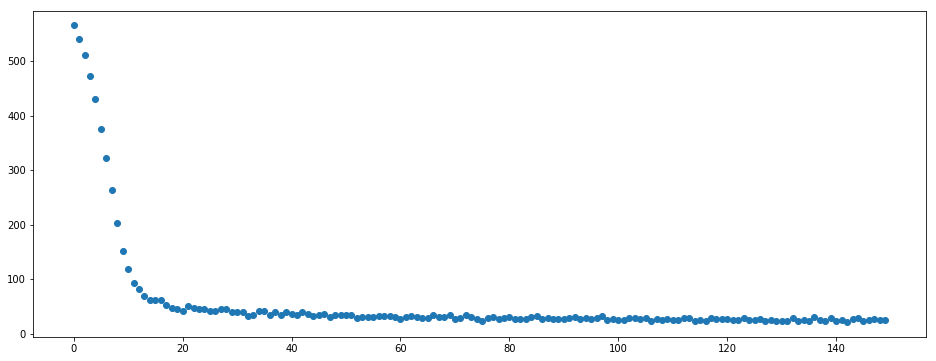

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(x=history.epoch, y=history.history['loss'])

- Run this same data through a linear regression model. Which achieves higher accuracy?


In [5]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression().fit(X_train, y_train)
y_pred = linReg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 20.982945190702573


- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
from sklearn.preprocessing import PolynomialFeatures

def int_poly_features(X, deg):
  X = X.copy()
  poly = PolynomialFeatures(deg)
  poly.fit(X)
  feat_X = poly.transform(X)
  return feat_X

X_train = int_poly_features(X_train, 2)
X_test = int_poly_features(X_test, 2)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=1000, verbose=0)

scores = model.evaluate(X_train, y_train)
print("train ", scores)
scores = model.evaluate(X_test, y_test)
print("test ", scores)

404/404 [==============================] - 0s 162us/sample - loss: 19.5068
train  19.506787583379463
102/102 [==============================] - 0s 90us/sample - loss: 32.6847
test  32.68466799866919


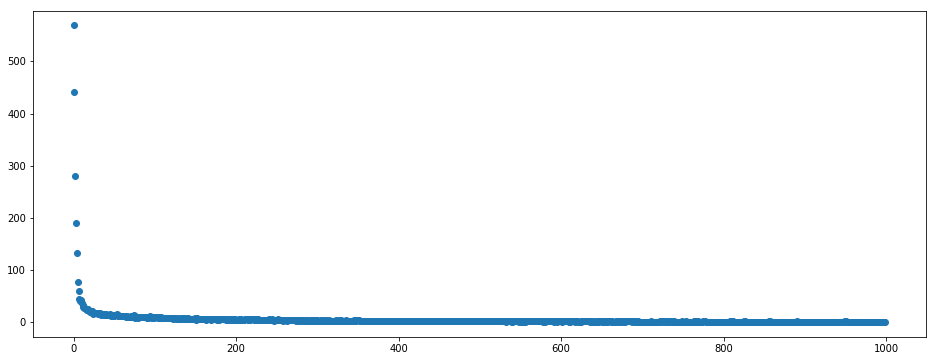

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(x=history.epoch, y=history.history['loss'])

In [9]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression().fit(X_train, y_train)
y_pred = linReg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 1.647824754026559e+24


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels

In [0]:
import keras
import tensorflow as tf

num_class = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.


In [17]:
mnist_model = Sequential()
#Input/hidden
mnist_model.add(Dense(16, input_shape=(784, ), activation='relu'))
mnist_model.add(Dropout(0.2))
#Hidden
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dropout(0.2))
#Output
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 100
history = mnist_model.fit(X_train, y_train, epochs=epochs, validation_split=.1, verbose=0)
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

In [0]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(x=history.epoch, y=history.history['loss'])

- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.